# 5. 모델 평가와 성능향상

* 교차검증,그리드탐색,평가지표<br>
* 모델평가과정<br>
훈련,테스트테스터분리 train_test_split -> 학습 fit -> 평가 score<br>

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action = 'ignore')

from matplotlib import font_manager, rc # 한글처리 위해서
plt.rcParams['axes.unicode_minus'] = False #마이너스(-)기호 깨지는거 방지

f_path = "c:/Windows/Fonts/malgun.ttf" # 한글처리 위해서
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [5]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X,y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)

print("테스트 세트 점수 :{:.2f}". format(logreg.score(X_test, y_test)))

테스트 세트 점수 :0.88


#### 데이터를 훈련 세트와 테스트 세트로 나누는 이유
* 새로운 데이터에 모델이 얼마나 잘 일반화되는지 측정
* 모델이 훈련 세트에 잘 맞는 것보다, 학습 과정에 없던 데이터에 대해 예측을 얼마나 잘 하느냐가 중요

### 5.1 교차 검증(Cross Validation) - 더 좋은 성능평가 위한 평가방법

* 평가방법 확장해보려 한다.
* 교차검증 : 일반화 성능을 측정하기 위해 훈련세트 테스터 세트 나눈것보다 더 안정적이고 뛰어난 통계적 평가방법
데이터 여러번 나누고 여러모델 학습
* 종류 : k-겹 교차검증, 계층별 k-겹 교차검증(k는 보통 5나 10사용),임의 분할 교차검증, 그룹별 교차검증
* Sklearn에서 cross_val_score함수 및 KFold,StratifiedKFold, GroupKFold 클래스등 제공

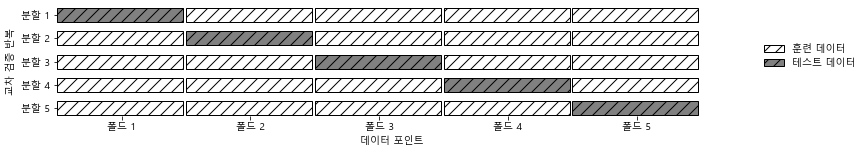

In [7]:
import mglearn
mglearn.plots.plot_cross_validation()

In [12]:
# CV = 5인 교차 검증(기본) - CV를 안주면 기본값 5겹으로 됨.
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

#모델, 훈련 데이터, 타깃레이블
scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수:", scores) #기본값이 5니깐 5개 나옴(정확도)

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [14]:
#cv = 5 인 교차검증 ==> 폴드 수는 cv 매개변수를 사용해서 변경 10겹
scores = cross_val_score(logreg, iris.data, iris.target, cv=10)
print("교차 검증 점수:", scores) #cv=10 이니 10개 정확도 값 나옴.

교차 검증 점수: [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


In [17]:
print("교차 검증 평균 점수:{:.2f}".format(scores.mean())) 

교차 검증 평균 점수:0.97


* 훈련세트 테스트세트 75% 25%나눌때보다 교차검증쓰니 성능 좋아짐.(88%->97%)

### 5.1.2 교차 검증의 장점

* 장점<br>
테스트 세트에는 모델별로 각 샘플이 정확하게 한번씩 들어가므로 모델의 일반화 성능을 보장한다.<br>
데이터를 여러겹으로 나누면 모델이 훈련 데이터에 얼마나 민감한지 알수 있다.<br>
분할을 한번 했을때 보다 데이터를 더 효과적으로 사용할수 있다.

* 단점<br>
연산 비용이 늘어남-하드웨어가 좋아져야 하고, 시간이 많이 걸림<br>
모델을 k 개 만들어야 하므로 하나의 모델보다 k배 느림<br>

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
print("iris 레이블:\n", iris.target)

iris 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 5.1.3 계층별 k-겹 교차검증 

* 1/3은 클래스 0, 1/3은 클래스 1, 1/3은 클래스 2
* 첫번째 폴드는 클래스 0만가지고 있으므로 정확도는 0
* 두번째, 세번째도 가은 방법으로 정확도는 0

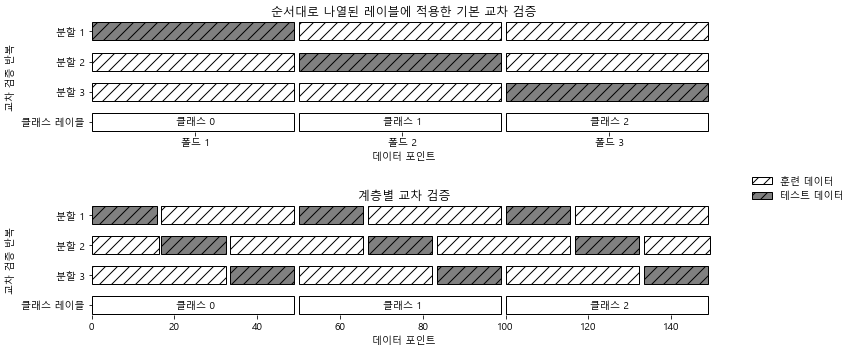

In [20]:
mglearn.plots.plot_stratified_cross_validation()

* 출력 클래스 비율이 일정하지 않으면 제대로 학습되지 않음<br>이런 문제 해결하기 위해 k_겹 보완하는 계층별 k-겹 교차검증 방식(standard cross-validation/Stratified Cross-validation:아이리스0인 데이터에서 cv값으로 나눠서 평가)

##### 분류기의 일반화 성능을 측정할때 k-겹 교차검증보다 더 안정적인 계층별 K-겹 교차 검증을 사용하는 것이 좋다.

### 1) 교차검증 상세 옵션
* scikit-learn에서는 cv매개변수에 교차 검증 분할기 cross-validation splitter를 전달함으로써 데이터 분할할때 ㅓㄷ 세밀하게 제어할수 있다. (cv=kfold)
* 대부분의 경우 회귀에서는 k-겹 교차검증, 분류에서는 게층별 k-겹 교차검증의 기본값이 잘 작동
* model_selection에서 KFold분할기를 임포트 하고 원하는 폴드 수를 넣어 객체를 생성해야 함

In [25]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5) #KFold객체생성

In [27]:
print("교차검증점수 :\n", cross_val_score(logreg,iris.data,iris.target, cv=kfold))

교차검증점수 :
 [1.         1.         0.86666667 0.93333333 0.83333333]


In [28]:
kfold = KFold(n_splits=3) #계층별 k-겹 교차검즈에서 cv를 3겹으로 하겠습니다.
print("교차검증점수 :\n", cross_val_score(logreg,iris.data,iris.target, cv=kfold))

교차검증점수 :
 [0. 0. 0.]


* n_splits=3일때 각 폴드는 iris 데이터셋의 클래스 중 하나에 대응하므로 아무것도 학습 할수 가 없다. 
* 데이터를 섞어서 샘플의 순서를 랜덤 (KFold의 shuffle 매개변수를 True)

In [30]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0) 
#suffle=True:데이터 섞어서 샘플 순서 랜덤,random_state를 고정 똑같은 작업 재현
#random_state안넣으면 실행할때마다 결과가 바뀜
print("교차검증점수 :\n", cross_val_score(logreg,iris.data,iris.target, cv=kfold))

교차검증점수 :
 [0.98 0.96 0.96]


* 일반화 성능을 높이기 위한 과정 

In [31]:
for n in [3,5]:
    kfold = KFold(n_splits=n, shuffle=True, random_state=0)
    scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
    print('n.splits={}, cross validation score{}'.format(n,scores))

n.splits=3, cross validation score[0.98 0.96 0.96]
n.splits=5, cross validation score[1.         0.83333333 1.         1.         0.93333333]


### 2) LOOCV

* 테스트 폴드에 단 하나의 샘플만 포함하는 k-겹 교차검증
* 테스트 폴드에 단 하나의 샘플만 포함
* 데이터셋이 클때는 시간이 매우 오래 걸리지만, 작은 데이터셋에서는 좋은 결과를 만들어냄

In [32]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print('iris.data.shape \n{}'.format(iris.data.shape))
print('교차 검증 분활 횟수:', len(scores))
print('평균 정확도:{:.2f}'.format(scores.mean()))

iris.data.shape 
(150, 4)
교차 검증 분활 횟수: 150
평균 정확도:0.97


### 3) 임의 분할 교차 검증
* Train_size만큼의 데이터로 훈련 세트를 만들고 test-size만큼의 테스터로 테스트 세트를 n_splits만큼 만들도록 분할
* Sklearn에서는 ShuffleSplit클래스 제공
* 10개의 데이터셋으로 나누고 5개는 훈련세트, 2개는 ㅌ테스트 세트로 4번 반복하는 사례

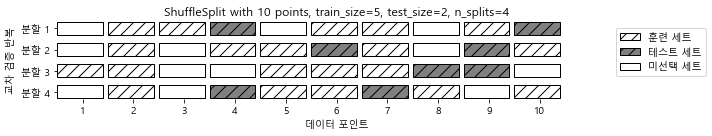

In [33]:
mglearn.plots.plot_shuffle_split()

* 훈련데이터 테스트데이터만 나누는것 보다 <br>
한번 더 나눠서 훈련데이터,검증셋(Valid Data-훈련데이터 푼거를 검증셋에서 확인),테스트 데이터로 하면 정확하지 않을까?

#### 데이터셋의 50%는 훈련세트, 50%는 테스트 세트로 10번 반복 분할
* train_size, test_size가 정수이면 세트 개수이며 실수이면 비율을 나타냄

In [35]:
from sklearn.model_selection import ShuffleSplit
#ShuffleSplit 객체 생성
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print('교차 검증 점수:\n', scores)

교차 검증 점수:
 [0.97333333 0.98666667 0.94666667 0.97333333 0.94666667 0.98666667
 0.94666667 0.96       0.96       0.92      ]


* Train_size와 test_size의 합이 전체 데이터셋과 다르게 하여 일부만 사용하는 이러한 부분 샘플링(subsamplig)은 대규모 데이터셋으로 작업할때 도움이 됨.

### 4) 그룹별 교차 검증

* 훈련 세트와 테스트 세트를 만들때 분리되지 않아야 할 그룹을 지정하는 교차검증

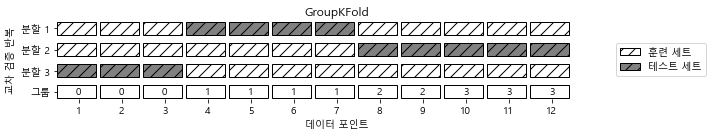

In [36]:
mglearn.plots.plot_group_kfold()

* 참고 자료 : http://scikit-learn.org/stable/modules/cross_validation.html

## 5.2 그리드 서치

* 매개변수를 튜닝하여 일반화 성능 높이기
* 관심 있는 매개변수들을 대상으로 가능한 모든 조합 시도해 보는 것
* RBF 커널 SVM 사례 커널의 폭에 해당하는 gamma와 규제 매개변수 C에 0.001, 0.001, 0.01, 1, 10, 100값을 적용 (p.337)
* 어떤 값이 좋은지 찾아줌

### 5.2.1 간단한 그리드 서치

#### 붓꽃 데이터셋을 이용한 그리드 서치
* 두 매개변수 조합에 대해 분류기 학습 및 평가하는 그리드 서치
* 하이퍼 파라미터 튜닝

In [41]:
# 간단한 그리드 서치 구현
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

print('훈련 세트의 크기:{}   테스트 세트의 크기:{}'.format(X_train.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        #매개변수와 각 조합에 대해 SVC를 훈련시킵니다.
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        #점수가 더 좋으면 매개변수와 함꼐 기록합니다.
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
            
print('최고 점수 :{:.3f}'.format(best_score))
print('최적 파라미터:', best_parameters)

훈련 세트의 크기:112   테스트 세트의 크기:38
최고 점수 :0.974
최적 파라미터: {'C': 100, 'gamma': 0.001}


* C를 100으로 주고 gamma값을 0.001로 주는 것이 가장 좋은 값이구나 하고 하이퍼파라미터 튜닝할때 쓰는 코드
* 이결과를 보면 이 데이터셋에서 모델 정확도가 97.4%
* 이 정확도는 새로운 데이터까지 이어지지 않을수 있다.
* 매개변수를 조정하기 위해 테스트 세트를 이미 사용하여서 평가를 하려면 독립된 테스트 세트가 필요하다

### 5.2.2 매개변수 과대적합과 검증세트

#### 매개변수 과대적합과 검증 세트
* 매개변수 조정시 사용한 검증 세트 대신 모델 평가를 위한 테스트 세트 필요
* 데이터를 세개의 세트로 구분할필요가 있음 훈련세트, 매개변수 조정을 위한 검증세트, 모델 평가를 위한 테스트 세트

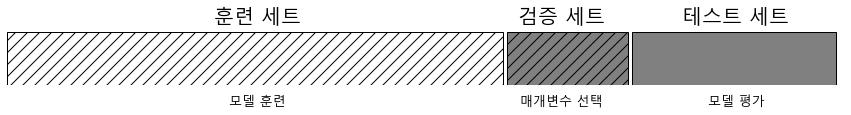

In [42]:
mglearn.plots.plot_threefold_split()

train_test_split을 이용한 iris데이터의 grid search
* 매개변수 검증 세트 사용
* 데이터 훈련, 검증, 테스트 세트로 분할

In [53]:
from sklearn.svm import SVC
#데이터를 훈련+검증 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(
iris.data, iris.target, random_state=0)
#훈련+검증 세트를 훈련 세트와 검증 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(
X_trainval, y_trainval, random_state=1)
print("훈련 세트의 크기: {}   검증 세트의 크기: {}   테스트 세트의 크기:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 검증 세트로 SVC를 평가합니다
        score = svm.score(X_valid, y_valid)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))
print('평균 정확도:{:.2f}'.format(test_score.mean()))

훈련 세트의 크기: 84   검증 세트의 크기: 28   테스트 세트의 크기: 38

검증 세트에서 최고 점수: 0.96
최적 파라미터:  {'C': 10, 'gamma': 0.001}
최적 파라미터에서 테스트 세트 점수: 0.92
평균 정확도:0.92


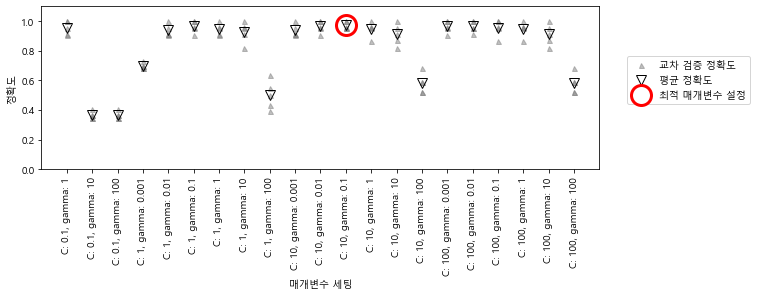

In [49]:
## 교차 검증을 위한 그리드 서치
# 교차 검증의 정확도 평균이 가장 높은 값 선택
mglearn.plots.plot_cross_val_selection()

* 교차검증 정확도가 가장 높은 곳 찾는다.

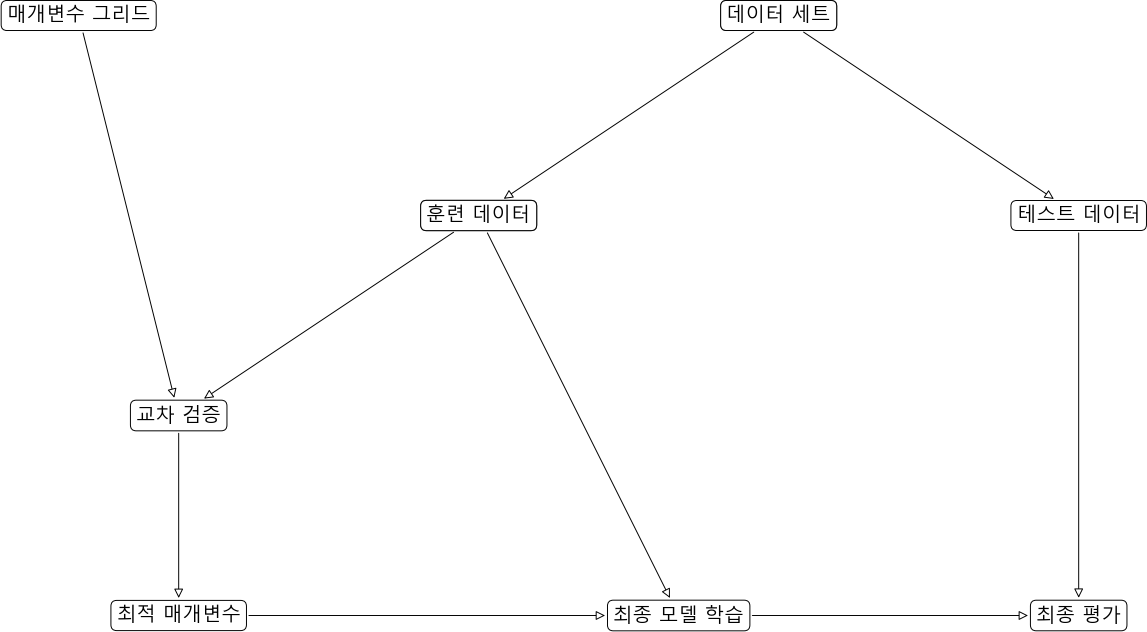

In [51]:
# 전체 모델 학습 및 평가 과정
mglearn.plots.plot_grid_search_overview()

In [ ]:
#위에 것을 이미 구현되어있는 GridSearchCV를 부르면 되
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

## 5.3 평가지표와 측정

### 5.3.1 최종 목표를 기억하라

### 5.3.2 이진 분류의 평가지표

### 1) 에러의 종류
거짓 음성(암인 사람에게 당신은 건강합니다.- 생명에 좌우 치명적)은 최대한 피해야 하며 <br>
거짓 양성(건강한 사람한테 당신은 암입니다 라고 함 - 비용추가)은 중요도가 낮음<br>
사람의 생명과 직결되는 것은 평가지표가 달라야 한다. 더 정확해야 한다.
* 거짓 음성은 반드시 피해야 한다.(false negative)

### 2) 불균형 데이터셋
두 종류의 오류(거짓 야성과 거짓 음성) 중 하나가 다른 것보다 훨씬 많을때 더 중요
99%정확도로 예측하는 분류기를 만들었다고 가정하면 정화도가 높아도 불균형 클래스 고려하지 못하면 잘못된 모델이다.<br>
머신러닝 모델을 만들지 않고서도 무조건 클릭아님으로 예측하면 그 정확도는 99%가 될수 있다.그러니 이럴때 평가지표가 좀 틀려야 한다.


In [55]:
#Digits 데이터셋을 사용해 숫자 9를 구분하는 9:1 데이터셋 생성
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9 

X_train, X_test, y_train, y_test = train_test_split(
digits.data, y, random_state=0)

In [59]:
import numpy as np
#dummy분류기(DummyClassifier)는 가장 많은 target라벨(여기 9가 아님)을 예측값으로 내놓음
#10개 숫자중에 아무거나 집어도 90프로가 나온다.
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
#most_frequent는 최빈값(가장 많이 나타나는)
pred_most_frequent = dummy_majority.predict(X_test)
print('예측된 레이블의 고유값:', np.unique(pred_most_frequent))
print('테스트 점수 :{:.2f}'.format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 고유값: [False]
테스트 점수 :0.90


* DummyClassifier로 다수 (9아님)을 예측
* 거의 아무것도 학습하지 않아도 90% 정확도

In [62]:
#DicisionTreeClassifier로 예측 - 크게 성능이 나아지지않음
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
#max_depth 깊이 2까지 리프로드 2개까지
pred_tree = tree.predict(X_test)
print('테스트 점수 : {:.2f}'.format(tree.score(X_test, y_test)))

테스트 점수 : 0.92


In [63]:
#무작위 예측 DummyClassifier와 LogisticRegression 비교
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train) #strategy=stratified 무작위
pred_dummy = dummy.predict(X_test)
print('dummy 점수 : {:.2f}'.format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('logreg 점수 : {:.2f}'.format(logreg.score(X_test, y_test)))

dummy 점수 : 0.90
logreg 점수 : 0.98


* 무작위로 예측하는 DummyClassifier는 결과가 안 좋습니다. 
* 반면 LogisticRegression 은 매우 좋으나 DummyClassifier도 90%를 맞추었으므로 실제로 이 결과가 유용한지 판단하기가 매우 어렵습니다.

* imbalanced datasets(발란스가 맞지않는 데이터)에서 예측 성능을 정량화하는 데 정확도는 적절한 측정 방법이 아니기 때문입니다.

* 특히 pred_most_frequent와 pred_dummy처럼, 빈도나 무작위 기반 예측보다 얼마나 더 나은지 알려주는 평가지표가 필요합니다.

* 모델을 평가하는 지표라면 이런 비상식적인 예측은 피할 수 있어야 합니다.


* 분류성능평가지표에는 정확도, 오차행렬, 정밀도, 재현율, F1스코어, ROC AUC가 있다.

* 혼동 행렬(confusion Matrix) : 정확도 정밀도 <br>
TP(true positive) -> 맞는 것을 올바르게 예측, TN(true negative) -> 틀린것을 올바르게 예측, FP(false positive)-> 틀린것을 맞다고 잘못 예측한것, FN(false negative) -> 맞는 것을 틀렸다고 잘못 예측한것           

* 정확도 Accuracy<br>
가장 많이 쓰는 것, 모든 tp를 전부 더하고 전체 갯수로 나눈것<br>
모든 데이터에 대해 클래스 라벨을 얼마나 잘 맞췄는지 계산(y(정답)와 y_hat(예측값)<br>
전체 - 맞춘것 = 정확도<br>
전체에서 몇개 맞췄는가 만으로는 평가할수 없다. 발란스를 이루지 못한 것은 다른 측정도구가 있어야 한다.
             
* 정밀도 Precisicon : TP/(TP+FP)

### 3) 혼동행렬(Confusion matrices) - 얼마나 혼동스러운지를 보여줌

### 정확도

#### 정확도와의 관계(맞계예측한 값/전체값) = 테스트점수

In [68]:
#logreg점수 : 0.98
(402+41)/450

0.9844444444444445

In [65]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print('오차 행렬:\n', confusion)

오차 행렬:
 [[402   1]
 [  6  41]]


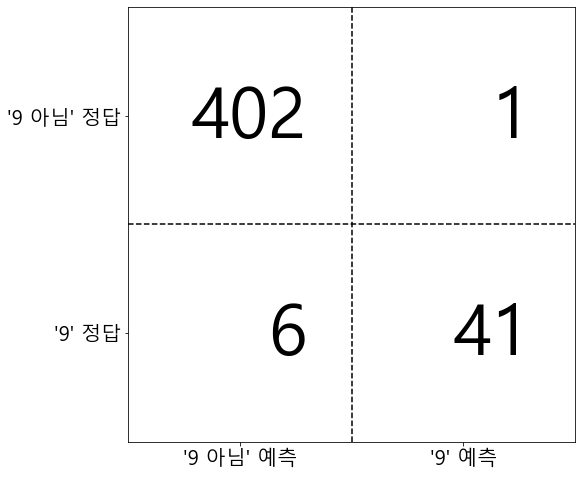

In [67]:
import mglearn
mglearn.plots.plot_confusion_matrix_illustration()

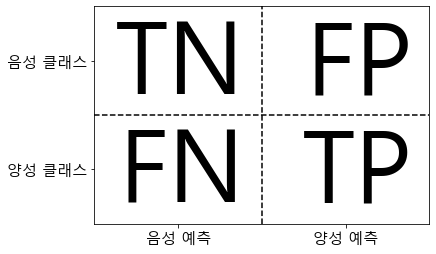

In [69]:
mglearn.plots.plot_binary_confusion_matrix()

In [70]:
print('빈도 기반 더미 모델:')
print(confusion_matrix(y_test, pred_most_frequent))
print('\n무작위 더미 모델:')
print(confusion_matrix(y_test, pred_dummy))
print('\n결정 트리:') #0.92 (390+23/450) 
print(confusion_matrix(y_test, pred_tree))
print('\n로지스틱 회귀:')
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[403   0]
 [ 47   0]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀:
[[402   1]
 [  6  41]]


* confusion_matrix를 보면 pred_most_frequent에서 잘못된 것이 보입니다.
* 항상 동일한 클래스를 예측하기 때문입니다.
* 반면에 pred_dummy는 특히 FN과 FP보다 TP가 매우 적고, TP보다 FP가 매우 많습니다.
* pred_logreg는 거의 모든 면에서pred_tree보다 낫습니다.
* 이 행렬의 모든 면을 살펴보면 많은 정보를 얻을 수 있지만, 매우 수동적이며 정성적인 방법입니다.


###### 정확도와의 관계
\begin{equation}
\text{정확도(accuracy)} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}


###### 정밀도, 재현율, f-점수(F1 score)
\begin{equation}
\text{정밀도(precision)} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}
* FP가 낮아져야 정밀도 올라간다.

\begin{equation}
\text{재현율(recall)} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}
* FN가 낮아져야 정밀도 올라간다.

\begin{equation}
\text{F} = 2 \cdot \frac{\text{정밀도} \cdot \text{재현율}}{\text{정밀도} + \text{재현율}}
\end{equation}


* 정밀도와 재현율의 조화 평균인 f-점수(f-score)또는 f-측정(f-mesure)
* 어떤 모델이 좋은지 직관적으로 판단하는데는 정확도보다 f1-점수가 낫다.
* f1-점수는 정확도보다 이해하거나 설명하기는 어렵다는게 단점이다.

* 데이터가 한쪽으로 치우칠때는 정규분포를 맞추고, accuracy정확도만으로는 볼수 없다. F1점수 사용하면 정확도 보다 나은 평가지표 가능

### 오차행렬 (f1-score) 불균형데이터
* 앞서 만든 네 모델의 F 점수 획득
    * 정밀도와 재현율을 함께 고려하므로 불균형 데이터셋에는 정확도보다 나은 평가지표가 될수 있음.

In [81]:
from sklearn.metrics import f1_score
print('빈도 기반 더미 모델의 f1 score:{:.2f}'.format(
     f1_score(y_test, pred_most_frequent)))
print('트리 모델의 f1 score:{:.2f}'.format(f1_score(y_test, pred_tree)))
print('로지스틱 회귀 모델의 f1 score:{:.2f}'. format(
f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score:0.00
트리 모델의 f1 score:0.55
로지스틱 회귀 모델의 f1 score:0.92


In [ ]:
from IPython.display import Image
Image('../data/decision_tree.png')

#### Classification_report함수
* 정밀도, 재현율, f-점수 등을 모두 한꺼번에 출력

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=['9아님', '9']))

              precision    recall  f1-score   support

         9아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [83]:
print(classification_report(y_test, pred_dummy, target_names=['9아님', '9']))

              precision    recall  f1-score   support

         9아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [86]:
print(classification_report(y_test, pred_logreg, target_names=['9아님', '9']))

              precision    recall  f1-score   support

         9아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



### 불확실성 함수 decision_function 함수 
임계값에 대한 변화 증명

### 정밀도-재현율 곡선( ROC와 AUC 곡선-의료분야에서 더 정확하게 하기위해)

재현율:암진단, 금융사기 판별(실제 양성이네 데이터 예측을 ) FN을 낮춰야해
    
정밀도:스팸메일(실제 음성인데 데이터 예측을 양성으로 하는 경우) FP를 낮춰야해

* 모델의 분류 작업을 결정하는 임계값을 박는 것은 해당 분류기의 정밀도와 재현율의 상충관계 조정하는일
* sklear.metrics모듈에서 정밀도-재현율 곡선 제공(ROC-수신자조작특성곡선,AUC)
* AUC는 1에 가까울수록 넓을수록 좋다.

# 책 참고

* 비지니스 목적에 따라 데이터에 따라 평가지표가 달라진다.